In [58]:
# Tratamiento de datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

from scipy import stats
import math

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
#import statsmodels.formula.api as smf

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Preprocesado y modelado
plt.rcParams["figure.figsize"] = (10,8)

# warnings
import warnings
warnings.filterwarnings('ignore')

# input

In [2]:
columnas = ["Customer_Number", 
            "Offer_Accepted", 
            "Reward", 
            "Mailer_Type", 
            "Income_Level", 
            "Bank_Accounts_Open",
            "Overdraft_Protection",
            "Credit_Rating",
            "Credit_Cards_Held",
            "Homes_Owned",
            "Household_Size",
            "Own_Your_Home",
            "AVG_Balance_Q1",
            "AVG_Balance_Q2",
            "AVG_Balance_Q3",
            "AVG_Balance_Q4",
            "Balance"
            ]

In [3]:
df = pd.read_csv('datos/creditcardmarketing.csv', header = None,
                 names=columnas)
df.head(1)

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0


# EDA
1. ver que tengo en el df y los tipos

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_Number       18000 non-null  int64  
 1   Offer_Accepted        18000 non-null  object 
 2   Reward                18000 non-null  object 
 3   Mailer_Type           18000 non-null  object 
 4   Income_Level          18000 non-null  object 
 5   Bank_Accounts_Open    18000 non-null  int64  
 6   Overdraft_Protection  18000 non-null  object 
 7   Credit_Rating         18000 non-null  object 
 8   Credit_Cards_Held     18000 non-null  int64  
 9   Homes_Owned           18000 non-null  int64  
 10  Household_Size        18000 non-null  int64  
 11  Own_Your_Home         18000 non-null  object 
 12  AVG_Balance_Q1        17976 non-null  float64
 13  AVG_Balance_Q2        17976 non-null  float64
 14  AVG_Balance_Q3        17976 non-null  float64
 15  AVG_Balance_Q4     

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
AVG_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
AVG_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
AVG_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
AVG_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [6]:
df.describe(include='object').T

,count,unique,top,freq
Offer_Accepted,18000,2,No,16977
Reward,18000,3,Air Miles,6061
Mailer_Type,18000,2,Postcard,9147
Income_Level,18000,3,Medium,9013
Overdraft_Protection,18000,2,No,15322
Credit_Rating,18000,3,High,6071
Own_Your_Home,18000,2,Yes,11655


- variables continuas:
    - `Offer_Accepted` -> booleana, es la variable respuesta
    - `Reward` -> categórica, son tres tipos: 
        - 'Air Miles'
        - 'Cash Back' 
        - 'Points'
    - `Mailer_Type`-> categórica, dos tipos:
        - 'Postcard' 
        - 'Letter'
    - `Income_Level` -> categórcia, dos tipos:
        - Medium
        - High
        - Low
    - `Overdraft_Protection` -> booleana
    - `Credit_Rating` -> categórica, tres variables:
        - Medium
        - High
        - Low
    - `Own_Your_Home`-> booleana
- variable numérica:
    - `Customer_Number` -> continua
    - `Bank_Accounts_Open` -> discreta
    - `Credit_Cards_Held` -> discreta
    - `Homes_Owned` -> discreta
    - `Household_Size` ->discreta
    - `AVG_Balance_Q1` -> continua
    - `AVG_Balance_Q2` -> continua
    - `AVG_Balance_Q3` -> continua
    - `AVG_Balance_Q4` -> continua
    - `Balance` -> continua

2. número de nulos en el dataset

In [7]:
df.isnull().sum() / df.shape[0]

Customer_Number         0.000000
Offer_Accepted          0.000000
Reward                  0.000000
Mailer_Type             0.000000
Income_Level            0.000000
Bank_Accounts_Open      0.000000
Overdraft_Protection    0.000000
Credit_Rating           0.000000
Credit_Cards_Held       0.000000
Homes_Owned             0.000000
Household_Size          0.000000
Own_Your_Home           0.000000
AVG_Balance_Q1          0.001333
AVG_Balance_Q2          0.001333
AVG_Balance_Q3          0.001333
AVG_Balance_Q4          0.001333
Balance                 0.001333
dtype: float64

3. check valores duplicados

In [8]:
df.duplicated().sum() / df.shape[0]

0.0

## variables continuas

In [9]:
import psutil
print(psutil.virtual_memory())

svmem(total=8589934592, available=2457649152, percent=71.4, used=3132145664, free=792936448, active=1676328960, inactive=1598636032, wired=1455816704)


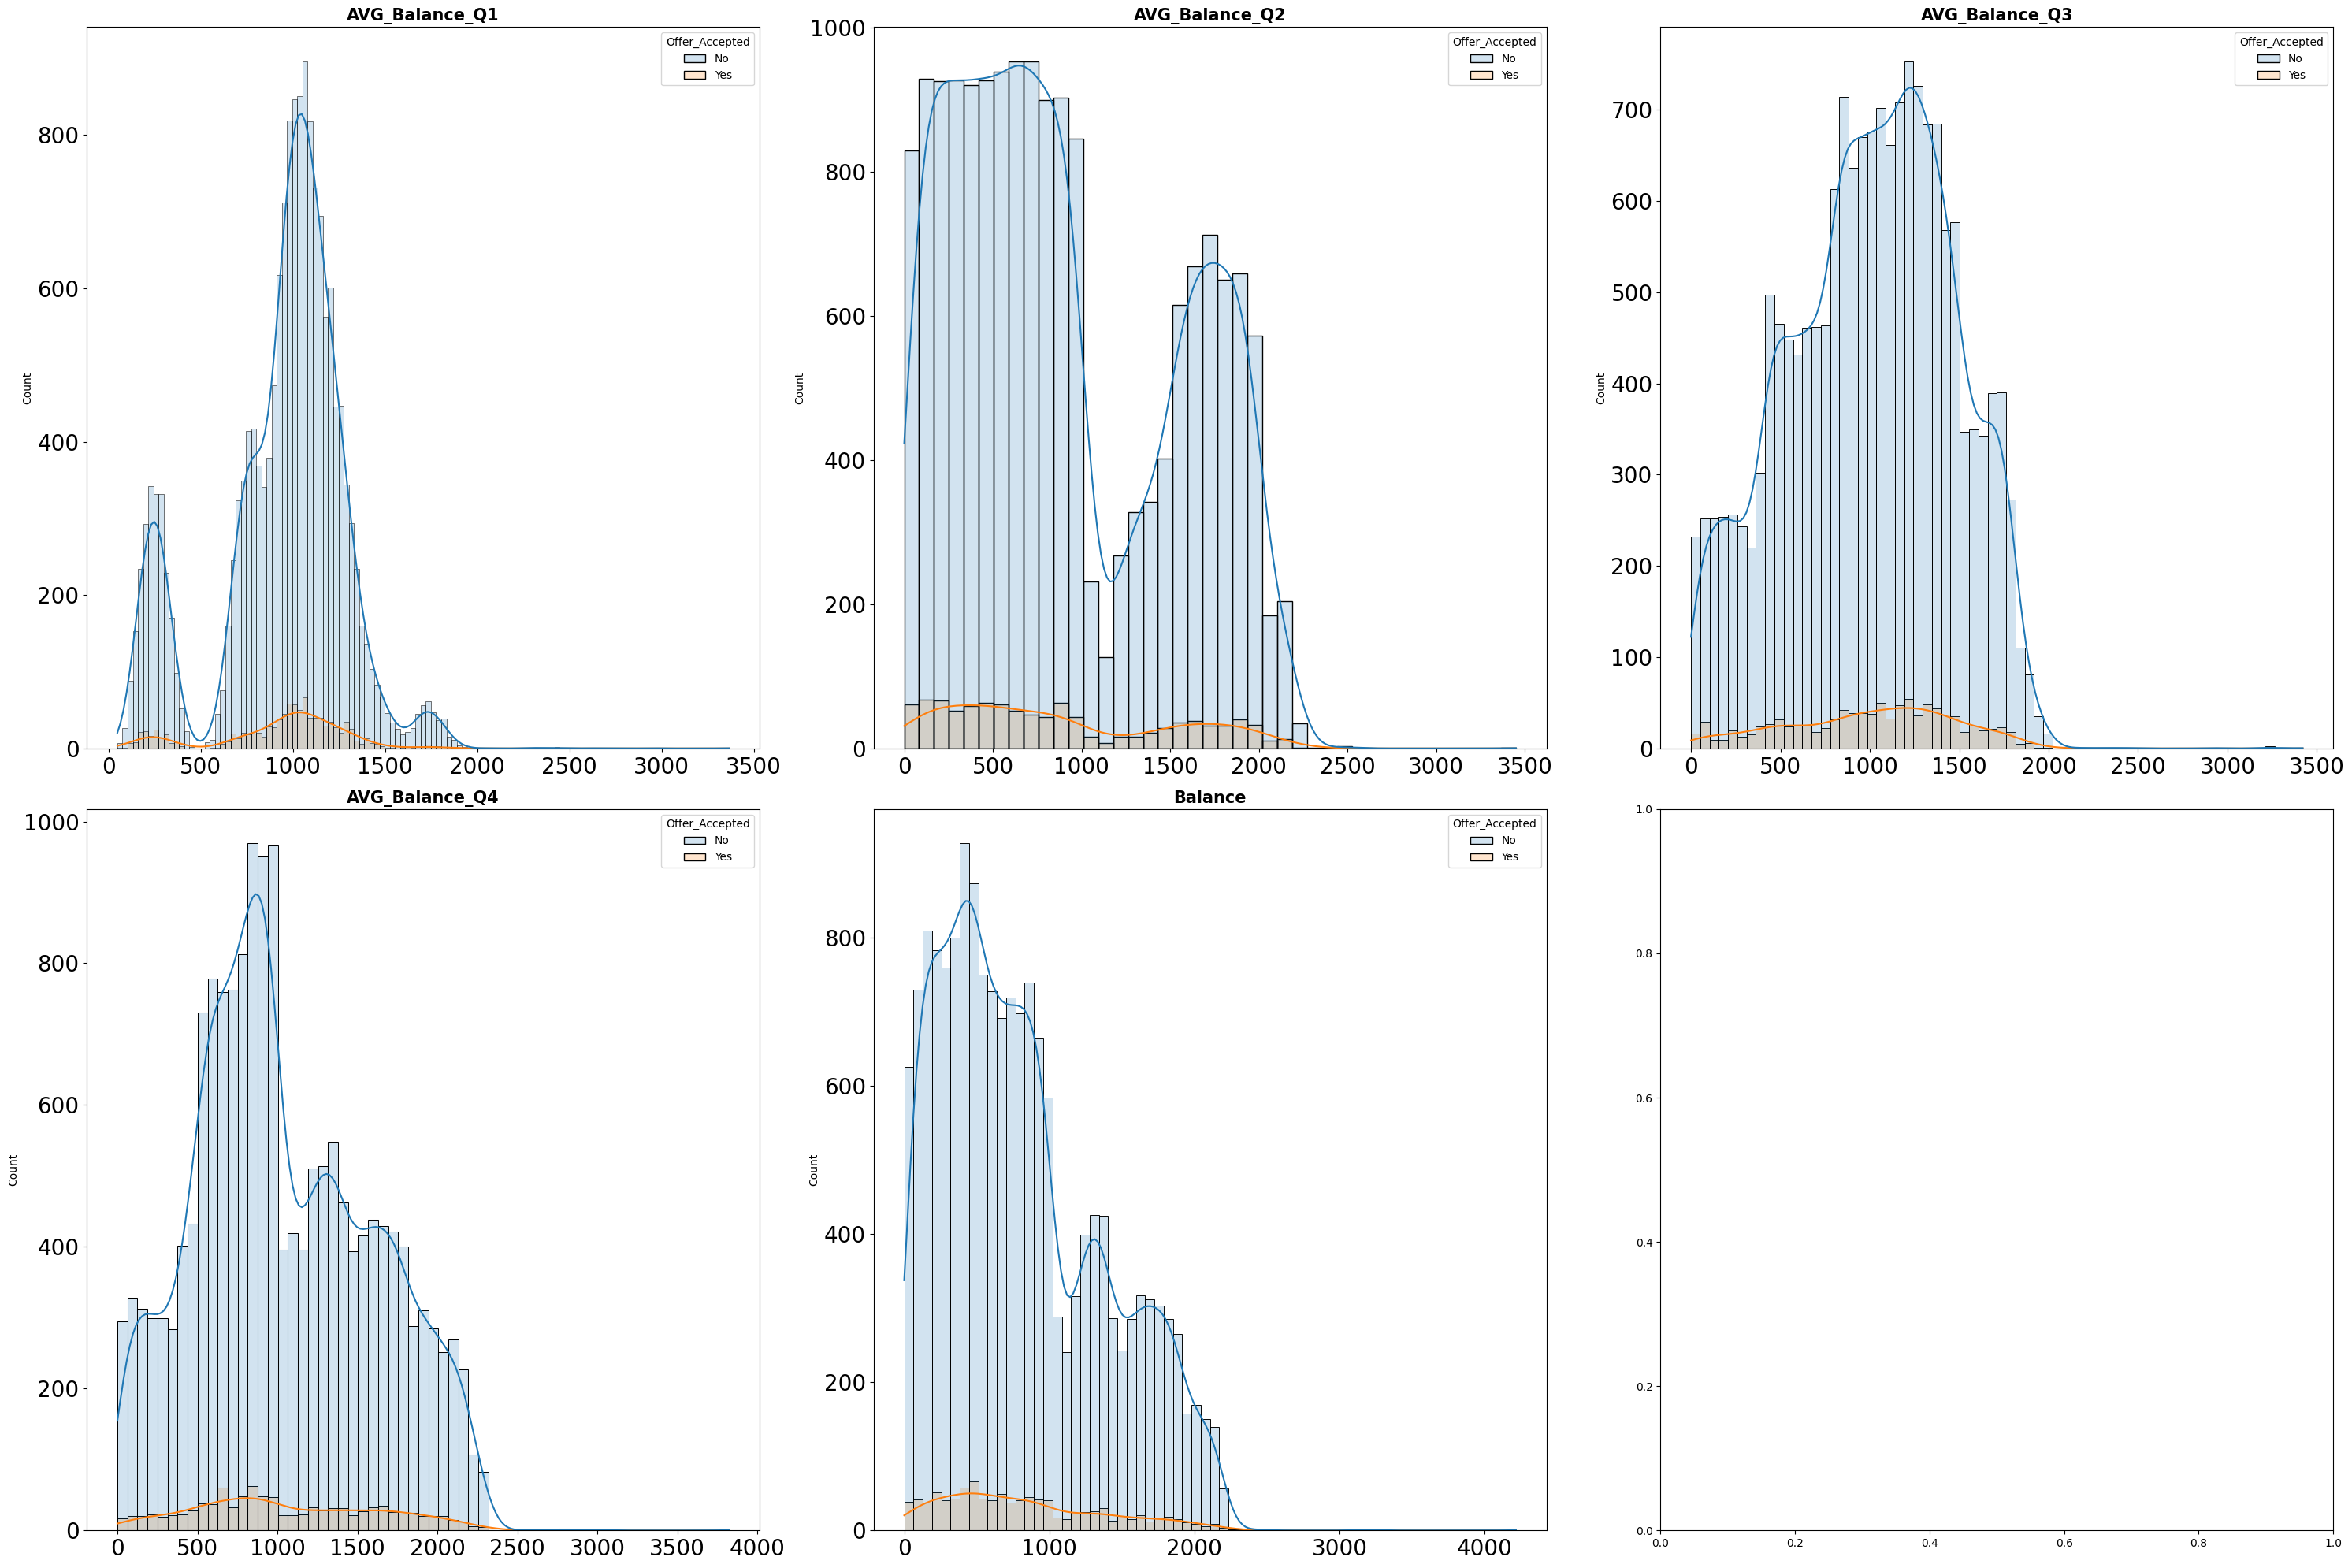

In [10]:
# Gráfico de distribución para cada variable numérica continua

fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (30, 20))

axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).drop(['Customer_Number', 'Household_Size', 'Bank_Accounts_Open', 'Credit_Cards_Held', 'Homes_Owned'], axis = 1).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True, 
        alpha = 0.2, 
        ax = axes[i],
        hue = df['Offer_Accepted']
        )
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();# Gráfico de distribución para cada variable numérica

Las variables predictoras numéricas están desviadas hacia la izquierda -- la mayor parte de los valores son pequeños y presentan outliers de valor superior. Esto lo veremos con más profundidad en la gestión de outliers.

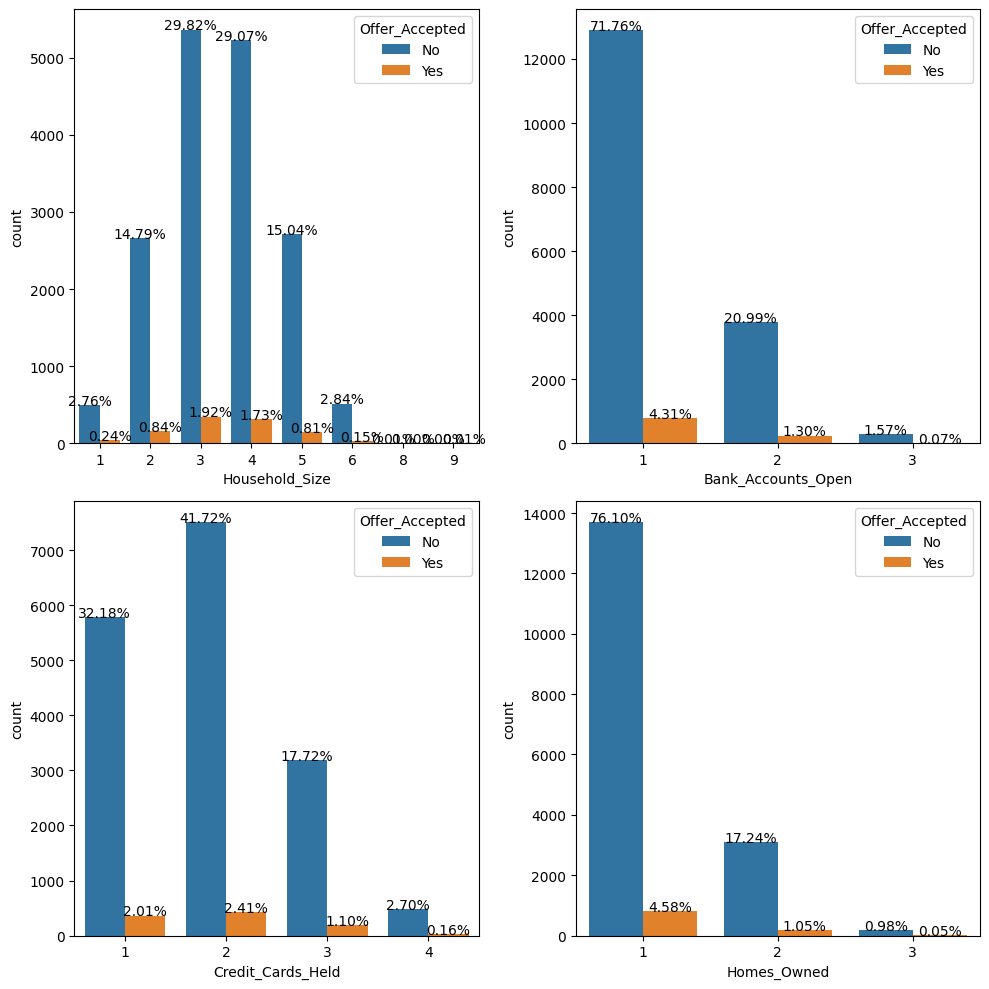

In [11]:
# Gráfico de distribución para cada variable numérica discreta

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

axes = axes.flat

columnas_numeric_disc = df[['Household_Size', 'Bank_Accounts_Open', 'Credit_Cards_Held', 'Homes_Owned']].columns

for i, colum in enumerate(columnas_numeric_disc):
    chart = sns.countplot(
                x = df[colum], 
                hue = df["Offer_Accepted"],
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

De estas variables, al ser pocas categorías, haremos un encoding como si fueran variables categóricas.

## variables categóricas

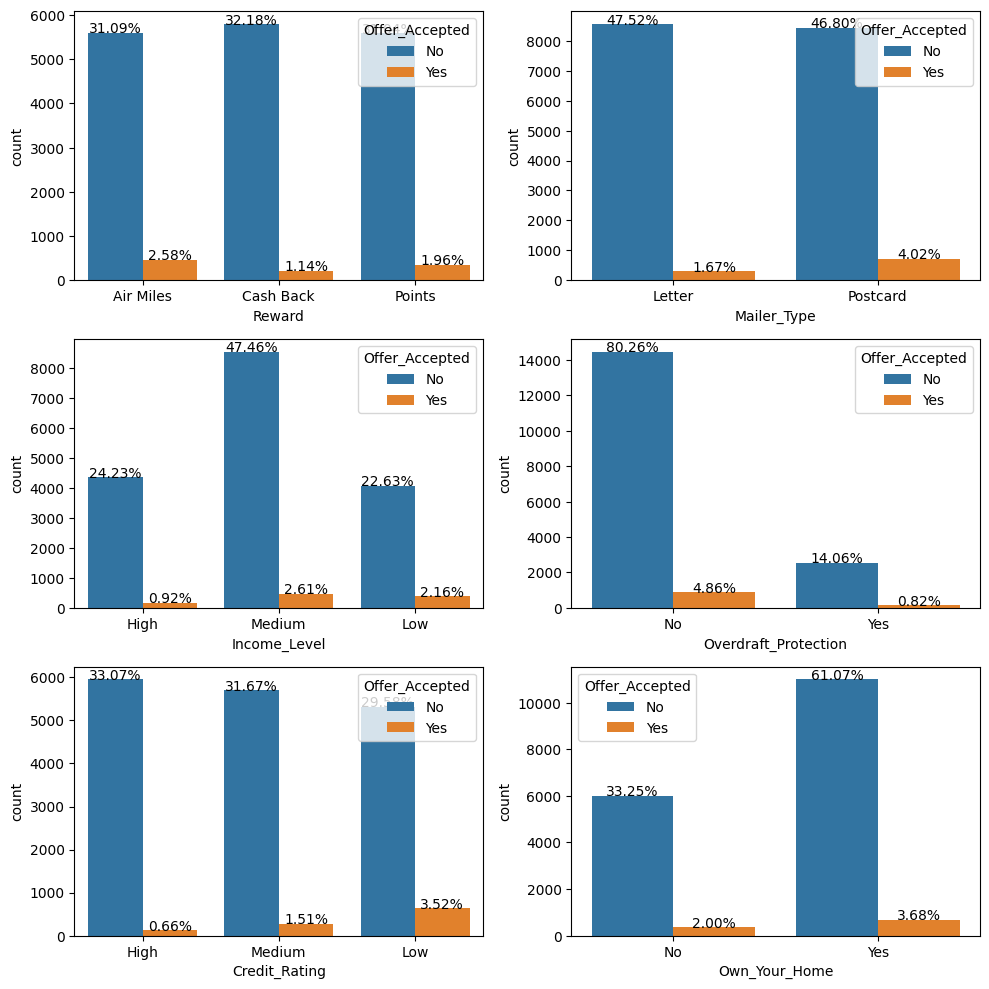

In [12]:
# Gráfico de relación entre variables predictoras y la variable a predecir

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (10, 10))

axes = axes.flat

columnas_cat = df.select_dtypes(include = "object").drop(['Offer_Accepted'], axis = 1).columns

for i, colum in enumerate(columnas_cat):
    chart = sns.countplot(
                x = df[colum],
                hue=df["Offer_Accepted"],
                ax = axes[i])
    total = float(len(df[colum]))
    for p in chart.patches:
        height = p.get_height()
        chart.text(p.get_x() + p.get_width() / 2., height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha='center')

fig.tight_layout();

existen variables categóricas con orden:
- `Overdraft_protection`
- `Own_Your_Home`
- `Income_Level`

y existen otras variables categóricas que no parecen tener orden:
- `Credit_Rating`
- `Reward`
- `Mailer_Type`

## variable respuesta

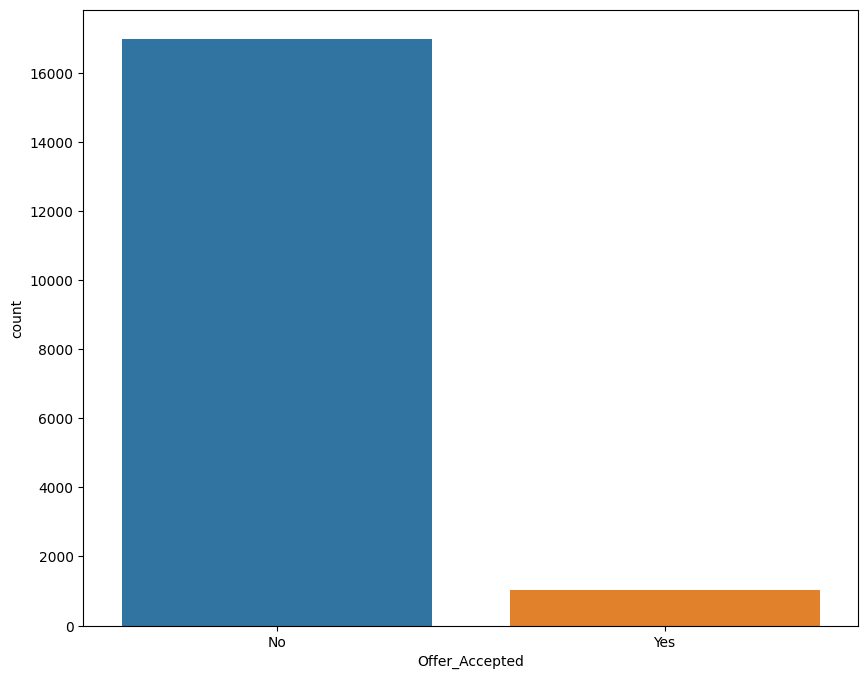

In [13]:
chart = sns.countplot(x = df['Offer_Accepted']);

In [14]:
df['Offer_Accepted'].value_counts() / df.shape[0]

No     0.943167
Yes    0.056833
Name: Offer_Accepted, dtype: float64

Como vemos, la variable respuesta está muy desbalanceada.

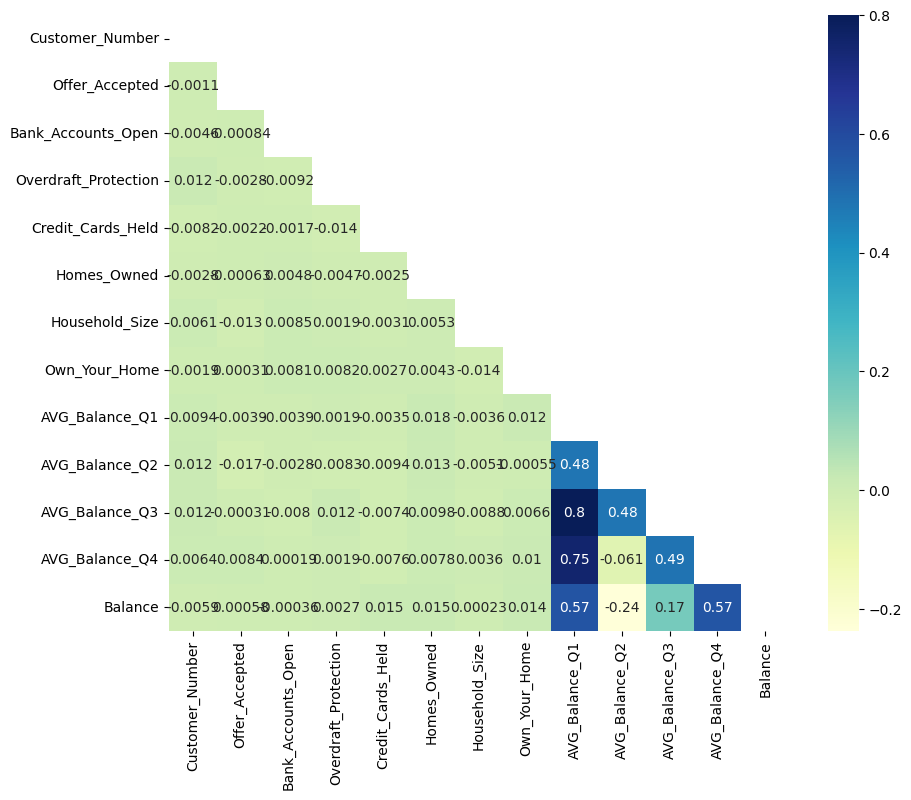

In [15]:
mask = np.triu(np.ones_like(df.replace(to_replace='Yes', value=1).replace(to_replace='No', value=0).corr(), dtype = bool))
sns.heatmap(df.replace(to_replace='Yes', value=1).replace(to_replace='No', value=0).corr(),
           cmap = "YlGnBu",
            mask = mask,
           annot = True);

porque está muy desbalanceada, en la matriz de correlación no vemos ninguna relación significativa. Habrá que repetir el mismo proceso cuando tengamos las variables balanceadas.

## correlacion

# gestión nulos

In [16]:
df.isnull().sum()

Customer_Number          0
Offer_Accepted           0
Reward                   0
Mailer_Type              0
Income_Level             0
Bank_Accounts_Open       0
Overdraft_Protection     0
Credit_Rating            0
Credit_Cards_Held        0
Homes_Owned              0
Household_Size           0
Own_Your_Home            0
AVG_Balance_Q1          24
AVG_Balance_Q2          24
AVG_Balance_Q3          24
AVG_Balance_Q4          24
Balance                 24
dtype: int64

Solo aparecen nulos en las variables que hemos identificado como variables numéricas continuas -> probaremos a sustituir por la mediana o por IterativeImputer, para ver cual tiene mejores resultados.

## iterativee imputer

In [17]:
# creamos una instancia del método Iterative Imputer con las características que queremos 
imputer = IterativeImputer(n_nearest_features=1, missing_values=np.nan, max_iter=10)

In [18]:
numericas1 = df.select_dtypes(include=np.number)
imputer.fit(numericas1)

IterativeImputer(n_nearest_features=1)

In [19]:
# transformamos nuestros datos, para que se reemplacen los valores nulos usando "transform". 
## ⚠️ Esto nos va a devolver un array!

imputer.transform(numericas1)

array([[1.0000e+00, 1.0000e+00, 2.0000e+00, ..., 8.7700e+02, 1.0950e+03,
        1.0020e+03],
       [2.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.0600e+02, 7.8000e+01,
        3.6600e+02],
       [3.0000e+00, 2.0000e+00, 2.0000e+00, ..., 3.5200e+02, 1.4500e+02,
        2.4200e+02],
       ...,
       [1.7998e+04, 1.0000e+00, 2.0000e+00, ..., 7.6700e+02, 1.1700e+03,
        1.4940e+03],
       [1.7999e+04, 1.0000e+00, 4.0000e+00, ..., 9.8300e+02, 8.6500e+02,
        1.6150e+03],
       [1.8000e+04, 2.0000e+00, 2.0000e+00, ..., 1.3780e+03, 1.9780e+03,
        6.0300e+02]])

In [20]:
# convertimos el array que nos devuelve en un dataframe

numericas_trans = pd.DataFrame(imputer.transform(numericas1), columns = numericas1.columns)
numericas_trans.head()

,Customer_Number,Bank_Accounts_Open,Credit_Cards_Held,Homes_Owned,Household_Size,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1.0,1.0,2.0,1.0,4.0,1160.75,1669.0,877.0,1095.0,1002.0
1,2.0,1.0,2.0,2.0,5.0,147.25,39.0,106.0,78.0,366.0
2,3.0,2.0,2.0,1.0,2.0,276.50,367.0,352.0,145.0,242.0
3,4.0,2.0,1.0,1.0,4.0,1219.00,1578.0,1760.0,1119.0,419.0
4,5.0,1.0,2.0,1.0,6.0,1211.00,2140.0,1357.0,982.0,365.0


In [21]:
df_it = df.copy()
df_it.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [22]:
df_it[numericas_trans.columns] = numericas_trans
df_it.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1.0,No,Air Miles,Letter,High,1.0,No,High,2.0,1.0,4.0,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2.0,No,Air Miles,Letter,Medium,1.0,No,Medium,2.0,2.0,5.0,Yes,147.25,39.0,106.0,78.0,366.0
2,3.0,No,Air Miles,Postcard,High,2.0,No,Medium,2.0,1.0,2.0,Yes,276.50,367.0,352.0,145.0,242.0
3,4.0,No,Air Miles,Letter,Medium,2.0,No,High,1.0,1.0,4.0,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5.0,No,Air Miles,Letter,Medium,1.0,No,Medium,2.0,1.0,6.0,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [23]:
df_it.isnull().sum()

Customer_Number         0
Offer_Accepted          0
Reward                  0
Mailer_Type             0
Income_Level            0
Bank_Accounts_Open      0
Overdraft_Protection    0
Credit_Rating           0
Credit_Cards_Held       0
Homes_Owned             0
Household_Size          0
Own_Your_Home           0
AVG_Balance_Q1          0
AVG_Balance_Q2          0
AVG_Balance_Q3          0
AVG_Balance_Q4          0
Balance                 0
dtype: int64

## median replace

In [24]:
df_medi = df.copy()

In [25]:
column_list = ['AVG_Balance_Q1', 'AVG_Balance_Q2', 'AVG_Balance_Q3', 'AVG_Balance_Q4','Balance']
for column in column_list:
    mediana = df_medi[column].median()
    df_medi[column].fillna(mediana, inplace=True)

In [26]:
df_medi.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.75,9000.5,13500.25,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.00,1.0,1.00,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.00,2.0,2.00,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.00,1.0,1.00,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.00,3.0,4.00,9.00
AVG_Balance_Q1,17976.0,940.515562,350.297837,48.25,787.50,1007.0,1153.25,3366.25
AVG_Balance_Q2,17976.0,910.450656,620.077060,0.00,392.75,772.0,1521.00,3450.00
AVG_Balance_Q3,17976.0,999.392190,457.402268,0.00,663.00,1032.0,1342.00,3421.00
AVG_Balance_Q4,17976.0,1042.033600,553.452599,0.00,633.00,945.5,1463.00,3823.00
Balance,17976.0,810.185803,559.001365,0.00,363.00,703.0,1212.00,4215.00


In [28]:
df_it.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
AVG_Balance_Q1,18000.0,940.515562,350.064214,48.25,787.9375,1006.5,1152.5625,3366.25
AVG_Balance_Q2,18000.0,910.450656,619.663515,0.00,393.0000,773.0,1520.2500,3450.00
AVG_Balance_Q3,18000.0,999.392190,457.097214,0.00,664.0000,1032.0,1342.0000,3421.00
AVG_Balance_Q4,18000.0,1042.033600,553.083487,0.00,633.0000,946.0,1462.0000,3823.00
Balance,18000.0,810.185803,558.628553,0.00,363.7500,704.0,1211.0000,4215.00


In [29]:
df_medi.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Number,18000.0,9000.500000,5196.296758,1.00,4500.7500,9000.5,13500.2500,18000.00
Bank_Accounts_Open,18000.0,1.255778,0.472501,1.00,1.0000,1.0,1.0000,3.00
Credit_Cards_Held,18000.0,1.903500,0.797009,1.00,1.0000,2.0,2.0000,4.00
Homes_Owned,18000.0,1.203444,0.427341,1.00,1.0000,1.0,1.0000,3.00
Household_Size,18000.0,3.499056,1.114182,1.00,3.0000,3.0,4.0000,9.00
AVG_Balance_Q1,18000.0,940.604208,350.072621,48.25,787.9375,1007.0,1152.5625,3366.25
AVG_Balance_Q2,18000.0,910.266056,619.684111,0.00,393.0000,772.0,1520.2500,3450.00
AVG_Balance_Q3,18000.0,999.435667,457.098763,0.00,664.0000,1032.0,1342.0000,3421.00
AVG_Balance_Q4,18000.0,1041.904889,553.094705,0.00,633.0000,945.5,1462.0000,3823.00
Balance,18000.0,810.042889,558.642246,0.00,363.7500,703.0,1211.0000,4215.00


puntúan relativamente similar, así que mantendré el dataframe del iterative imputer.

# gestión outliers
para ver los outliers de las varaibles numéricas continuas, usaremos un boxplot

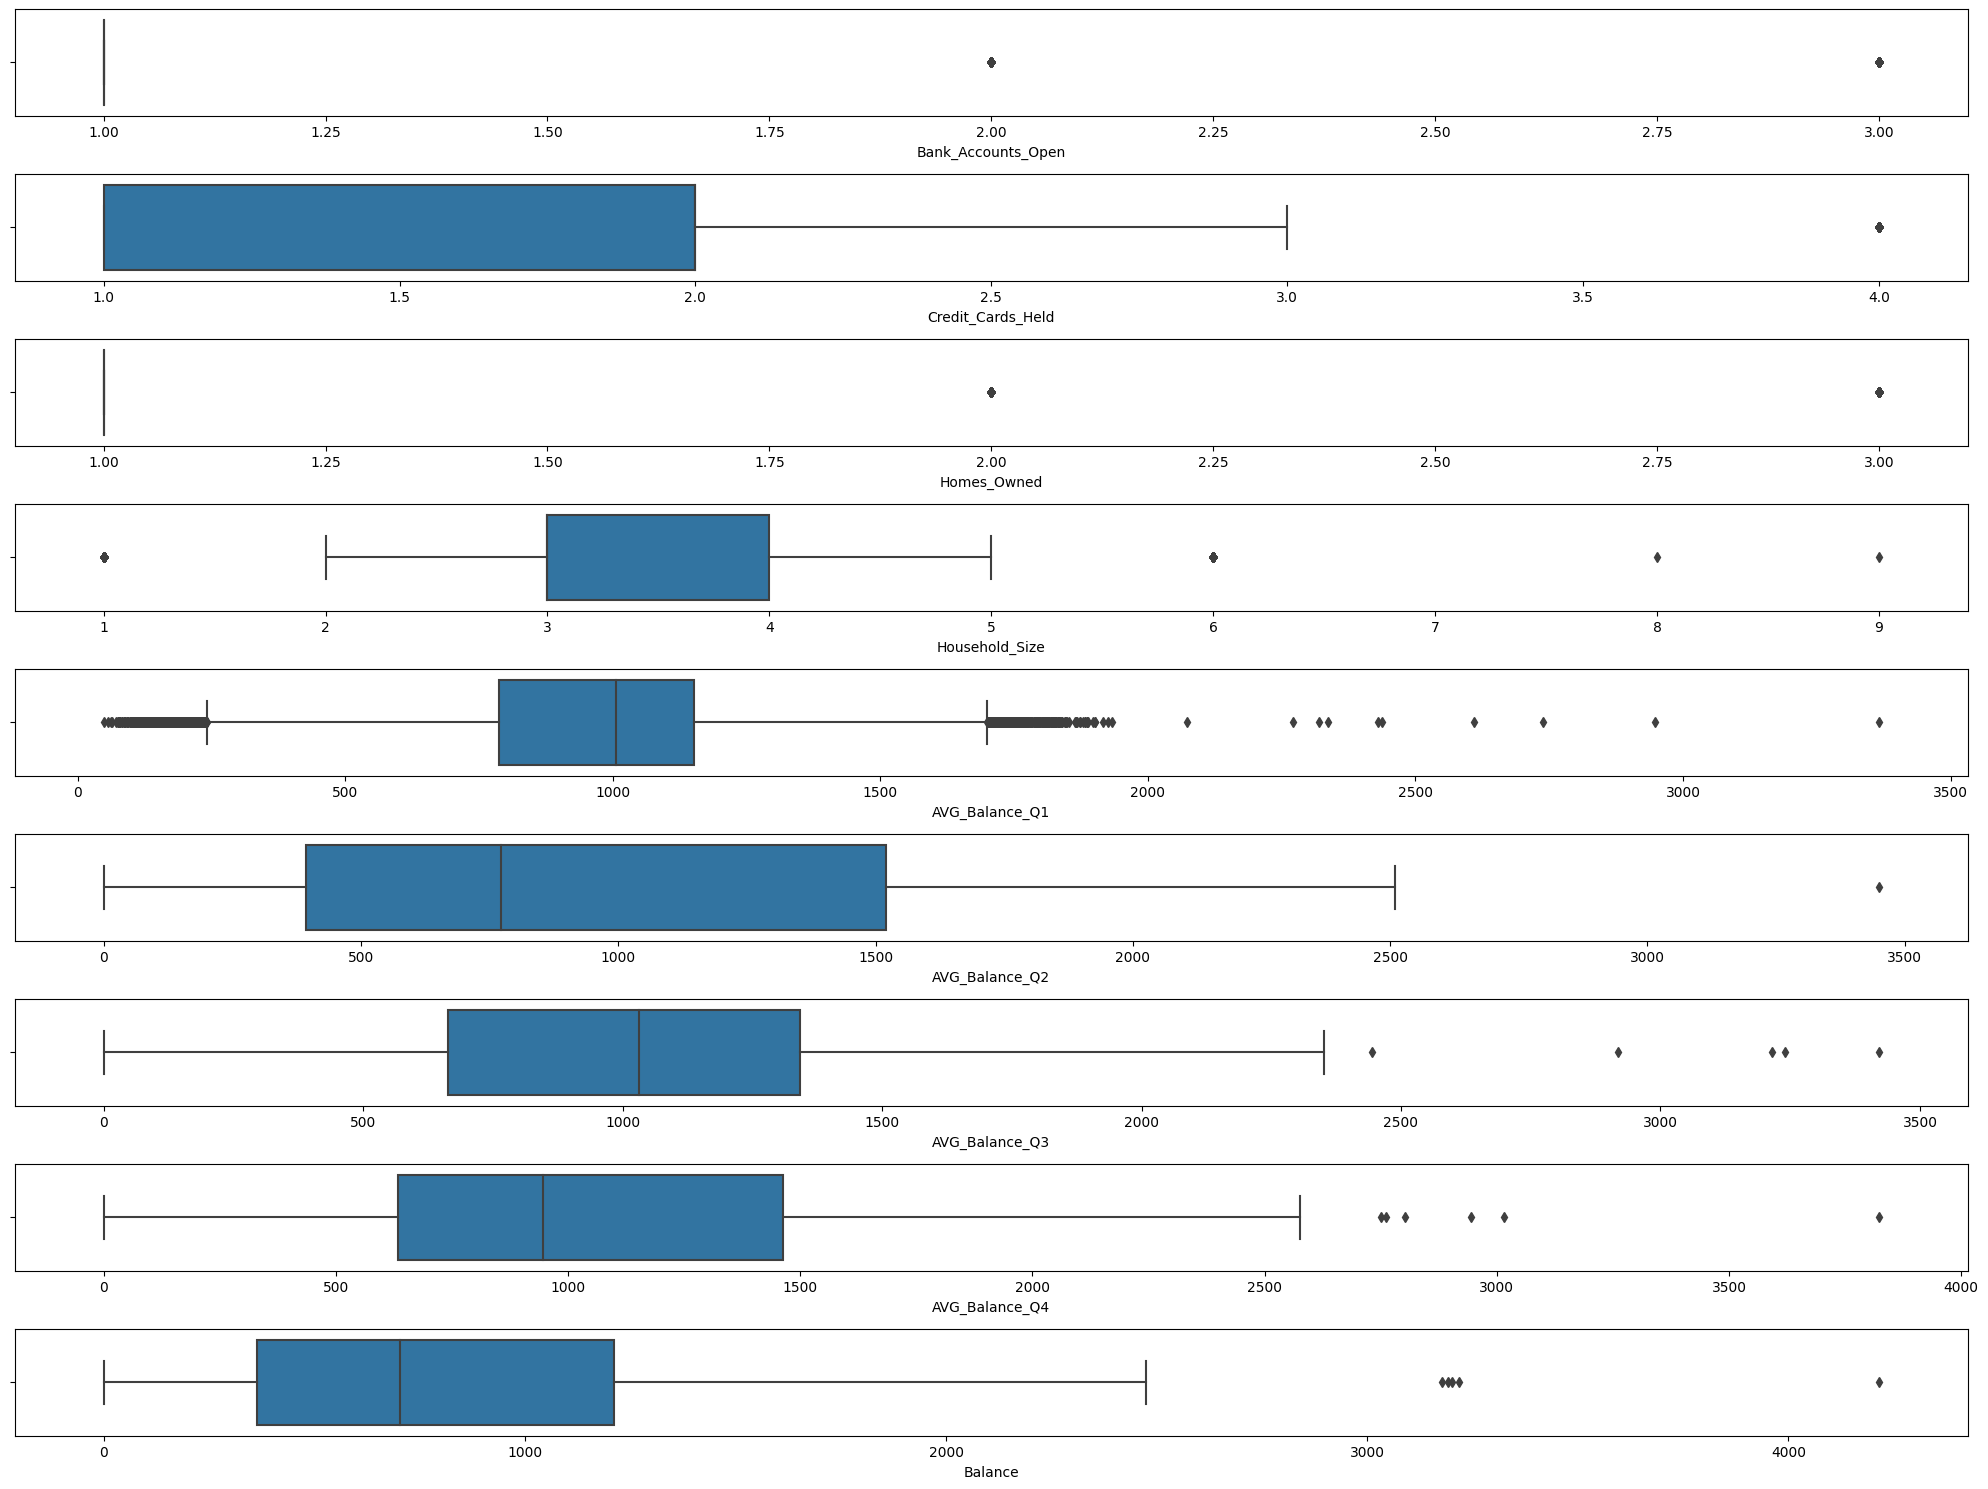

In [30]:
df_numericas = df_it.select_dtypes(include = np.number).drop(['Customer_Number'], axis =1)
fig, ax = plt.subplots(9, 1, figsize=(20,15))

for i in range(len(df_numericas.columns)):
    sns.boxplot(x=df_numericas.columns[i], data=df_numericas, ax=ax[i])
    #ax[i].set_title(i)
plt.tight_layout()
plt.show()

In [31]:
def detectar_outliers(lista_columnas, dataframe):

    dict_indices = {}

    for i in lista_columnas:
        Q1 = np.nanpercentile(dataframe[i], 25)
        Q3 = np.nanpercentile(dataframe[i], 75)

        IQR = Q3 - Q1

        outlier_step = IQR * 1.5
        outliers_value = dataframe[(dataframe[i] < Q1 - outlier_step) | (dataframe[i] > Q3 + outlier_step)]

        if outliers_value.shape[0] > 0:
            dict_indices[i] = outliers_value.index.tolist()
        else:
            #dict_indices[i] = 'sin outliers'
            pass
    return dict_indices

In [32]:
dict_outliers = detectar_outliers(df_numericas.columns, df_numericas)
for key in dict_outliers.keys():
    print(key, '-', len(dict_outliers[key]), '-', len(dict_outliers[key]) * 100 / df_numericas.shape[0])

Bank_Accounts_Open - 4308 - 23.933333333333334
Credit_Cards_Held - 515 - 2.861111111111111
Homes_Owned - 3477 - 19.316666666666666
Household_Size - 1079 - 5.9944444444444445
AVG_Balance_Q1 - 1471 - 8.172222222222222
AVG_Balance_Q2 - 1 - 0.005555555555555556
AVG_Balance_Q3 - 5 - 0.027777777777777776
AVG_Balance_Q4 - 6 - 0.03333333333333333
Balance - 5 - 0.027777777777777776


Viendo los outliers, las variables numéricas continuas ['AVG_Balance_Q1', 'AVG_Balance_Q2', 'AVG_Balance_Q3', 'AVG_Balance_Q4', 'Balance'] son las que menos presentan outliers. 
<br>Las variables que más outliers presentan son las variables numéricas discretas [Bank_Accounts_Open, Credit_Cards_Held, Homes_Owned, Household_Size], pero eso se puede corregir haciendo un encoding posteriormente, ya que se pueden considerar variables categóricas.
<br>En este caso, vamos a mantener los outliers.

# estandarización

In [33]:
def estandarizacion(dataframe, columnas, input):
    data = dataframe[columnas]
    if input == 'media':
        modelo = StandardScaler()
    elif input == 'mediana':
        modelo = RobustScaler()
    else:
        print("aprende a escribir")
    modelo.fit(data)
    X = modelo.transform(data)
    return X

En este caso, como mantenemos los outliers, mejor un `RobustScaler` para estandarizar con la mediana.

In [34]:
df_it[columnas_numeric] = estandarizacion(df_it, columnas_numeric, 'mediana')
df_it.head()

,Customer_Number,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home,AVG_Balance_Q1,AVG_Balance_Q2,AVG_Balance_Q3,AVG_Balance_Q4,Balance
0,1.0,No,Air Miles,Letter,High,1.0,No,High,2.0,1.0,4.0,No,0.423037,0.794855,-0.228614,0.179735,0.351726
1,2.0,No,Air Miles,Letter,Medium,1.0,No,Medium,2.0,2.0,5.0,Yes,-2.356531,-0.651142,-1.365782,-1.047045,-0.398938
2,3.0,No,Air Miles,Postcard,High,2.0,No,Medium,2.0,1.0,2.0,Yes,-2.002057,-0.360169,-1.002950,-0.966224,-0.545294
3,4.0,No,Air Miles,Letter,Medium,2.0,No,High,1.0,1.0,4.0,No,0.582791,0.714127,1.073746,0.208685,-0.336382
4,5.0,No,Air Miles,Letter,Medium,1.0,No,Medium,2.0,1.0,6.0,Yes,0.560850,1.212686,0.479351,0.043426,-0.400118


# encoding

Para el encoding, se tomaran las variables categóricas y las continuas discretas.

In [35]:
columnas_cat = df_it.columns.drop(columnas_numeric.tolist()).drop('Customer_Number')
df_cat = df_it[columnas_cat]
print(df_cat.shape)
df_cat.head(1)

(18000, 11)


,Offer_Accepted,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home
0,No,Air Miles,Letter,High,1.0,No,High,2.0,1.0,4.0,No


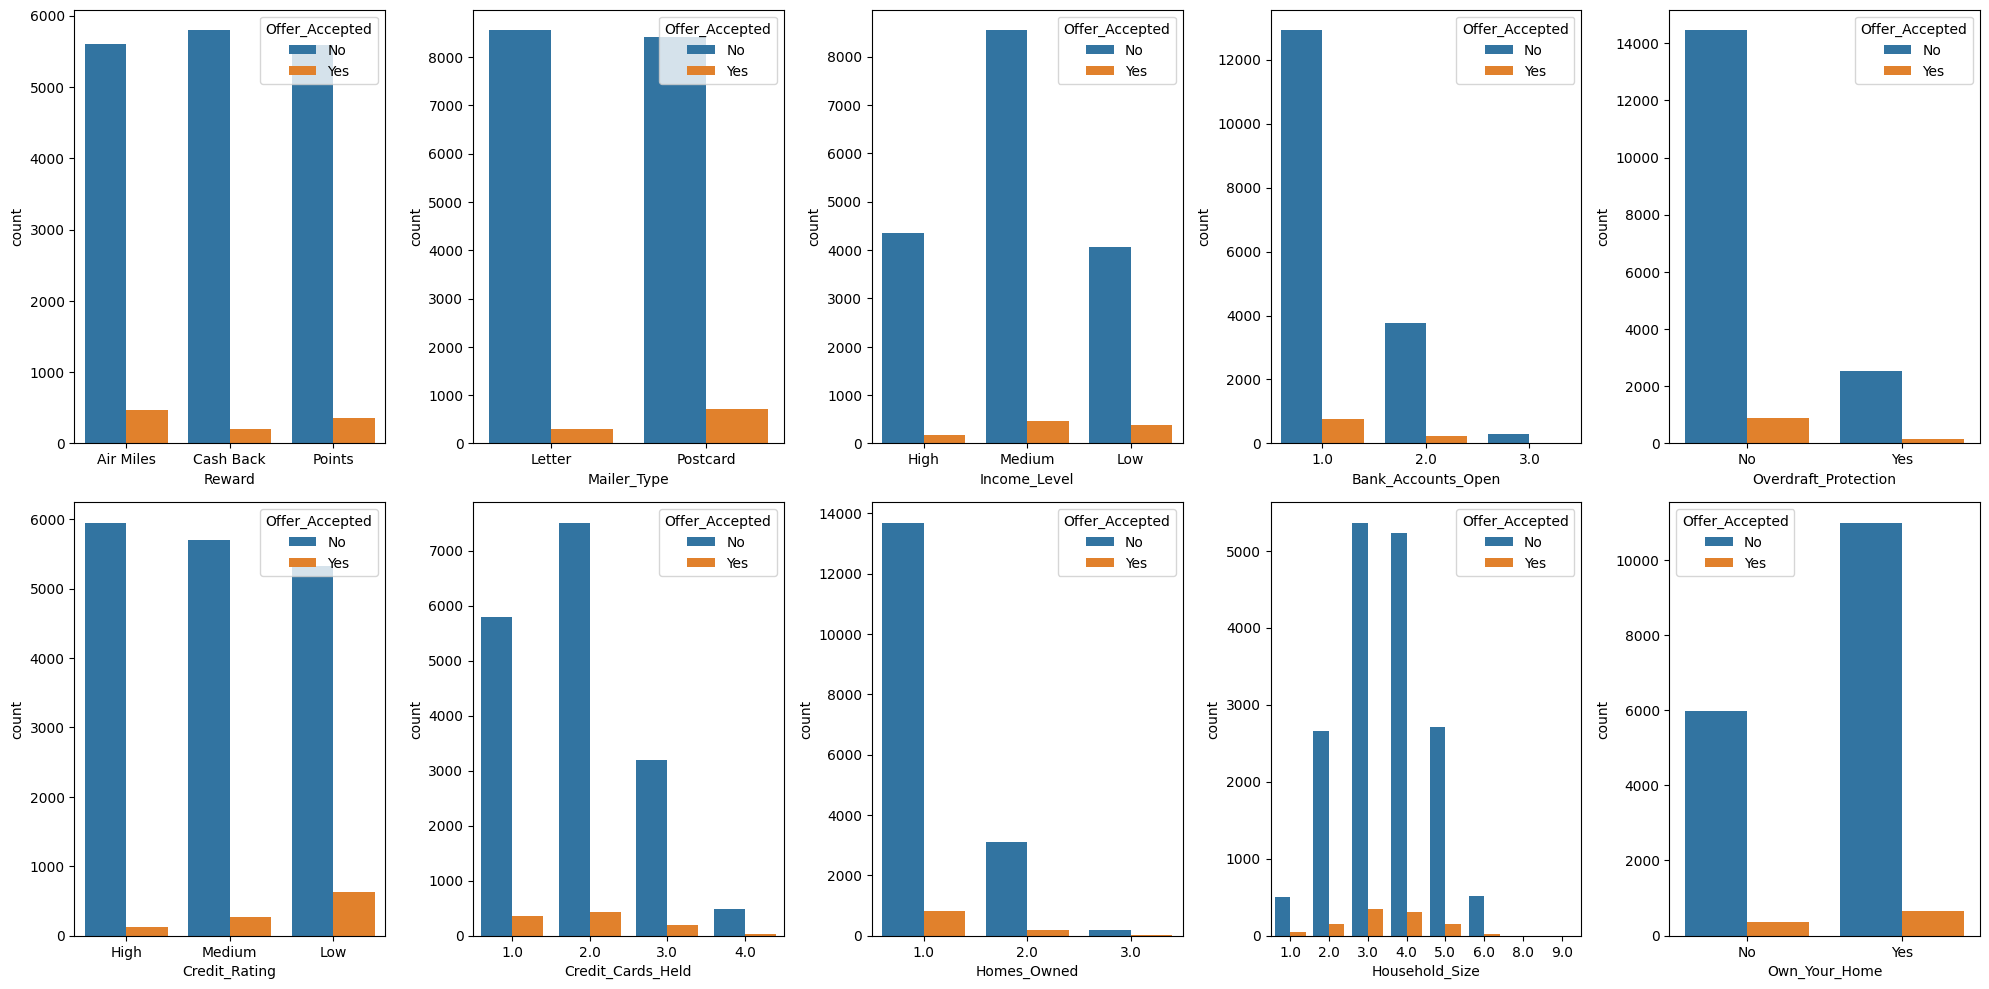

In [36]:
# Gráfico de relación entre variables predictoras y la variable a predecir

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (20, 10))

axes = axes.flat

for i, colum in enumerate(columnas_cat.drop('Offer_Accepted')):
    chart = sns.countplot(
            x = df_cat[colum],
            hue = df_cat['Offer_Accepted'],
            ax = axes[i])

fig.tight_layout();

existen variables categóricas con orden:
- `Income_Level`
- `Bank_Accounts_Open`
- `Overdraft_protection`
- `Credit_Card_Held`
- `Homes_Owned`
- `Household_Size`
- `Own_Your_Home`

y existen otras variables categóricas que no parecen tener orden:
- `Reward`
- `Mailer_Type`
- `Credit_Rating`

In [37]:
df_cat.drop(['Offer_Accepted'], axis = 1, inplace = True)
df_cat.head(1)

,Reward,Mailer_Type,Income_Level,Bank_Accounts_Open,Overdraft_Protection,Credit_Rating,Credit_Cards_Held,Homes_Owned,Household_Size,Own_Your_Home
0,Air Miles,Letter,High,1.0,No,High,2.0,1.0,4.0,No


In [55]:
pd.DataFrame(df_cat['Income_Level'].value_counts()).reset_index().sort_values(by='Income_Level')

,index,Income_Level
2,Low,4461
1,High,4526
0,Medium,9013


In [57]:
pd.DataFrame(df_cat['Income_Level'].value_counts()).reset_index().sort_values(by='Income_Level')['index'].unique().tolist()

['Low', 'High', 'Medium']

In [ ]:
# vamos a definir una función que nos aplique este método

def one_hot_encoder(dff, columnas):
    
    '''
    columnas: lista
    '''
    
    oh = OneHotEncoder()
    
    transformados = oh.fit_transform(dff[columnas])
    
    oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
    
    dff[oh_df.columns] = oh_df
    
    dff.drop(columnas, axis = 1, inplace = True)
    
    return dff

In [ ]:
def encoding(dataframe, columnas, input):
    
    if input == 'downsampling':
        oh = OneHotEncoder()
        transformados = oh.fit_transform(dff[columnas])
        oh_df = pd.DataFrame(transformados.toarray(), columns = oh.get_feature_names_out(), dtype = int)
        dff[oh_df.columns] = oh_df
        dff.drop(columnas, axis = 1, inplace = True)
    elif input == 'upsampling':
        modelo = RandomOverSampler()
    else:
        print("aprende a escribir")
    X_mod, y_mod = modelo.fit_resample(X,y)
    return X_mod, y_mod

# balanceo de las variables

me genero una función para tener las dos posibilidades de balanceo: downsampling y upsampling.

In [ ]:
def balanceo(dataframe, variable_respuesta, input):
    X = dataframe.drop([variable_respuesta], axis = 1)
    y = dataframe[[variable_respuesta]]
    if input == 'downsampling':
        modelo = RandomUnderSampler()
    elif input == 'upsampling':
        modelo = RandomOverSampler()
    else:
        print("aprende a escribir")
    X_mod, y_mod = modelo.fit_resample(X,y)
    return X_mod, y_mod

In [ ]:
X_down, y_down = balanceo(df_it, 'Offer_Accepted', 'downsampling')

In [ ]:
print(X_down.shape)
X_down.head()

In [ ]:
print(y_down.shape)
y_down.head()

In [ ]:
y_down.value_counts()